<a href="https://colab.research.google.com/github/HydrOpOtesJA99/A.I-learning-CNN-analysis/blob/main/14_My_image_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14_My_image_실습

## 1) 이미지 파일의 준비

In [71]:
# notMNIST_small 파일을 다운로드
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz

# 압축해제
!tar -xzf notMNIST_small.tar.gz

#압축해제 파일은 colaboratory 맨 좌측의 '파일'에서 찾을 수 있다.

> 지금 사용할 dataset = NotMNIST: A~J 10개의 알파벳 분류

## 2) 준비한 이미지를 read

In [91]:
# 이미지 읽어서 데이터 준비하기

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png') # glob.glob: paths로 경로를 지정
# notMNIST_small 폴더가 아닌 다른 폴더로 응용가능, .png 형태뿐 아니라 다양한 형식도 가능, 여러 이미지 형식파일 사용도 가능하긴 함

paths = np.random.permutation(paths) # 가져온 경로(paths)를 random하게 섞는다

독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))]) # 파일경로에 가서 28,28로 이미지를 읽는다
종속 = np.array([paths[i].split('/')[-2] for i in range(len(paths))]) # 폴더 속 정답을 가져와 채운다

print(독립.shape, 종속.shape) #

(18724, 28, 28) (18724,)




*   paths = np.random.permutation(paths) # 가져온 경로(paths)를 random하게 섞으므로 위 코드를 다시 실행하면 독립 및 종속변수의 값이 바뀐다.



In [92]:
종속[0:10]

array(['G', 'G', 'E', 'A', 'E', 'J', 'B', 'H', 'J', 'F'], dtype='<U1')

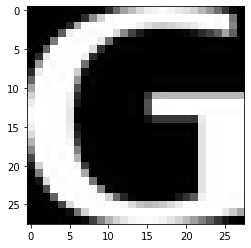

In [93]:
plt.imshow(독립[0], cmap='gray') # 독립변수 0번째 값의 이미지를 볼 수 있다.

* neural network에 적용하려면 '이미지 셋'이 4차원 형태(18724, 28, 28, 1)여야한다

* '이미지 셋'이 4차원=(18274, 28, 28, 1)이면, '이미지 한 장'은 3차원=(28, 28, 1)이 된다.

* 따라서 이미지.reshape 수행해줘야 한다

## 3) 이미지셋을 reshape, 원핫인코딩

In [94]:
#  이미지셋의 reshape

독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [95]:
# 원핫인 코딩을 통해 표형태로 변환된 모습

종속[0:10] 

,A,B,C,D,E,F,G,H,I,J
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0,0


## 4) 모델의 구성 

In [96]:
import tensorflow as tf

# 모델을 구성한다. 

X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [97]:
# 모델의 형태

model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 400)               0   

## 5) 모델의 학습

In [98]:
# 모델의 학습

model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 3s 4ms/step - loss: 0.5014 - accuracy: 0.8537
Epoch 2/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2572 - accuracy: 0.9229
Epoch 3/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2029 - accuracy: 0.9396
Epoch 4/10
586/586 [==============================] - 3s 5ms/step - loss: 0.1681 - accuracy: 0.9481
Epoch 5/10
586/586 [==============================] - 3s 6ms/step - loss: 0.1410 - accuracy: 0.9571
Epoch 6/10
586/586 [==============================] - 3s 5ms/step - loss: 0.1196 - accuracy: 0.9617
Epoch 7/10
586/586 [==============================] - 3s 5ms/step - loss: 0.0976 - accuracy: 0.9686
Epoch 8/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0825 - accuracy: 0.9733
Epoch 9/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0685 - accuracy: 0.9778
Epoch 10/10
586/586 [==============================] - 3s 5ms/step - loss: 0.0539 - accuracy: 0.9825

In [99]:
## 6) 모델의 이용

pred = model.predict(독립[0:10])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.00,0.00,0.0,0.0,0.0,1.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.0,0.0,0.0,1.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.0,1.0,0.0,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.0,1.0,0.0,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,1.00
6,0.01,0.49,0.02,0.0,0.0,0.0,0.08,0.06,0.27,0.07
7,0.00,0.00,0.00,0.0,0.0,0.0,0.00,1.00,0.00,0.00
8,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,1.00
9,0.00,0.00,0.00,0.0,0.0,1.0,0.00,0.00,0.00,0.00


In [100]:
# 정답 확인

종속[0:10] 

,A,B,C,D,E,F,G,H,I,J
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0,0


> 값이 잘 예측됨을 확인